# Imports

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Preprocessing & Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Optimisation (Fine-tuning Hyperparameters)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold
)

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    precision_recall_fscore_support,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Visualisation Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Model Explainer
import shap

# Save/Export Models and Datasets
import pickle
import joblib
from google.colab import files

# Preprocessing

## Loading the Dataset

In [2]:
# Load CSVs
features_df = pd.read_csv('datasets/elliptic_txs_features.csv')
classes_df = pd.read_csv('datasets/elliptic_txs_classes.csv')

Downloading...
From: https://drive.google.com/uc?id=1SO4vme33DCGmL3VTYV9myph9suqlL71s
To: /content/elliptic_txs_classes.csv
100%|██████████| 3.31M/3.31M [00:00<00:00, 184MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1ZiHg7nmp00qt56xrpOXqB5zor6tAmNjo
From (redirected): https://drive.google.com/uc?id=1ZiHg7nmp00qt56xrpOXqB5zor6tAmNjo&confirm=t&uuid=82107069-1f3f-4b6c-9480-13b81afaf47f
To: /content/elliptic_txs_features.csv
100%|██████████| 690M/690M [00:06<00:00, 113MB/s] 


In [3]:
# Quick preview
print("Features shape:", features_df.shape)
display(features_df.head())

print("Classes shape:", classes_df.shape)
display(classes_df.head())

Features shape: (203768, 167)


,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


Classes shape: (203769, 2)


,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


## Cleaning the Dataset

In [4]:
# Assign proper names to transaction id and time step features
features_df.rename(columns={features_df.columns[0]: 'txId', features_df.columns[1]: 'timeStep'}, inplace=True)

print("Features shape:", features_df.shape)
display(features_df.head())

Features shape: (203768, 167)


,txId,timeStep,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [5]:
# Merge the datasets
transactions_df = pd.merge(features_df, classes_df, on='txId', how='left')

print("Merged data shape:", transactions_df.shape)
transactions_df.head()

Merged data shape: (203768, 168)


,txId,timeStep,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,unknown


In [6]:
# Drop any rows with missing data
transactions_df = transactions_df.dropna()
display(transactions_df)

,txId,timeStep,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203763,173077460,49,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
203764,158577750,49,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,...,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,unknown
203765,158375402,49,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,...,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203766,158654197,49,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,...,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,unknown


In [7]:
# Find out all the values in class
transactions_df['class'].value_counts()

,count
class,
unknown,157204
2,42019
1,4545


In [8]:
# Drop rows with unknown as the class
no_unknown_df = transactions_df.loc[(transactions_df['class'] != "unknown"), 'txId']
transactions_df = transactions_df.loc[transactions_df['txId'].isin(no_unknown_df)]

display(transactions_df)
print("Transactions data shape:", transactions_df.shape)

,txId,timeStep,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665,class
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
8,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
9,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
10,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
15,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203751,80329479,49,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,2
203753,158406298,49,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,2
203758,158375075,49,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203762,147478192,49,-0.093732,-0.116160,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.082559,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2


Transactions data shape: (46564, 168)


In [9]:
# make class only 0s and 1s for binary classification
transactions_df['class'] = transactions_df['class'].replace('2', 0)
transactions_df['class'] = transactions_df['class'].replace('1', 1)
transactions_df['class'].value_counts()

/tmp/ipython-input-9-1428541033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df['class'] = transactions_df['class'].replace('2', 0)
/tmp/ipython-input-9-1428541033.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transactions_df['class'] = transactions_df['class'].replace('1', 1)
/tmp/ipython-input-9-1428541033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,count
class,
0,42019
1,4545


## Splitting the Data into Train/Test Sets





In [10]:
# Split the features from the target and remove redundant features
X_raw = transactions_df.drop(columns=['txId', 'timeStep', 'class'])
y_raw = transactions_df['class']

print("X shape:", X_raw.shape)
print("y shape:", y_raw.shape)

X shape: (46564, 165)
y shape: (46564,)


In [11]:
# Split the data into 70% training, 30% testing
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0, stratify=y_raw)

display(X_train_raw.head())
print(f"Train set: {X_train_raw.shape}")
display(X_test_raw.head())
print(f"Test set: {X_test_raw.shape}")

,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,-0.16793302645225652,-0.04970696439403985,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
147393,-0.147861,-0.016933,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.157195,-0.150473,0.065628,...,-0.562153,-0.588384,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
33575,-0.159984,-0.184668,-1.201369,0.103143,-0.063725,0.138585,-0.061584,-0.162431,-0.162340,-0.013537,...,-0.577099,-0.588384,0.241128,0.241406,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
103549,-0.167092,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.157617,-0.163516,-0.049707,...,-0.569626,-0.607306,-0.979074,-0.978556,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
130185,-0.172687,-0.024186,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163581,-0.169285,-0.048878,...,-0.547208,-0.588384,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792
42840,-0.172408,-0.081127,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163055,-0.168878,-0.049707,...,-0.233344,-0.298242,1.461330,1.461369,0.018279,-0.08749,-0.131155,-0.097524,-0.120613,-0.119792


Train set: (32594, 165)


,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,-0.16793302645225652,-0.04970696439403985,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
42795,-0.172924,0.031421,0.463609,0.553368,-0.043875,0.641758,-0.061584,-0.163639,-0.169454,-0.049707,...,1.216408,1.013705,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
182513,-0.058037,-0.113846,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.046037,-0.053500,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
186795,-0.172945,-0.123312,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163605,-0.169420,-0.049707,...,-0.569626,0.641566,1.461330,1.461369,-0.098889,0.912182,2.332341,2.099224,1.519700,1.521399
32051,-0.156359,-0.184668,-1.201369,0.103143,-0.063725,0.138585,-0.061584,-0.160005,-0.164512,-0.041465,...,-0.577099,3.170848,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
86105,-0.172951,-0.175452,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.163612,-0.169427,-0.049707,...,0.162722,0.010822,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


Test set: (13970, 165)


## Scaling Numerical Features

In [12]:
# Scale the numerical features using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Initial Model Training and Evaluation

In [13]:
def evaluate_model(model, model_name="Model"):
    # Predict on train and test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Prepare results DataFrame
    results_df = pd.DataFrame([
        ['Accuracy', accuracy_train, accuracy_test],
        ['Precision', precision_train, precision_test],
        ['Recall', recall_train, recall_test],
        ['F1 Score', f1_train, f1_test]
    ], columns=['Metric', 'Train', 'Test'])

    print(f"{model_name} Results:")
    display(results_df)

    # Return metrics and predictions
    return results_df, y_pred_train, y_pred_test

## Logistic Regression

In [14]:
lr_model = LogisticRegression(max_iter=1000, random_state=0)
lr_model.fit(X_train, y_train)

results_lr, y_pred_train_lr, y_pred_test_lr = evaluate_model(lr_model, model_name="Logistic Regression")

Logistic Regression Results:


,Metric,Train,Test
0,Accuracy,0.917408,0.917323
1,Precision,0.689977,0.689655
2,Recall,0.279157,0.278592
3,F1 Score,0.397493,0.396867


## Random Forest

In [15]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

results_rf, y_pred_train_rf, y_pred_test_rf = evaluate_model(rf_model, model_name="Random Forest")

Random Forest Results:


,Metric,Train,Test
0,Accuracy,1.0,0.987688
1,Precision,1.0,0.994196
2,Recall,1.0,0.879032
3,F1 Score,1.0,0.933074


## XGBClassifier


In [16]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=0)
xgb_model.fit(X_train, y_train)
results_xgb, y_pred_train_xgb, y_pred_test_xgb= evaluate_model(xgb_model, model_name="XGBClassifier")

XGBClassifier Results:


,Metric,Train,Test
0,Accuracy,1.0,0.991410
1,Precision,1.0,0.984424
2,Recall,1.0,0.926686
3,F1 Score,1.0,0.954683


## Storing Results For Later Comparison

In [17]:
before_optimisation_results = {
    'Logistic Regression': results_lr,
    'Random Forest': results_rf,
    'XGBClassifier': results_xgb
}

# Model Optimisation (Fine-tuning Hyperparameters)

## Grid Search

In [18]:
def finetune_model_using_gridsearch(model, param_grid, X_train, y_train, scoring='f1', model_name=None):
    if model_name:
        print(f"\nTuning hyperparameters for {model_name}...\n")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nBest parameters for {model_name}:\n{grid_search.best_params_}")
    print(f"Best {scoring} score: {grid_search.best_score_:.4f}\n")

    return grid_search.best_estimator_, grid_search

## Randomised Search

In [19]:
def finetune_model_using_randomisedsearch(model, param_grid, X_train, y_train, scoring='f1', model_name=None):
    if model_name:
        print(f"\nTuning hyperparameters for {model_name}...\n")

    grid_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=5,
        scoring=scoring,
        cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=0),
        verbose=1,
        n_jobs=-1,
        random_state=0
    )

    grid_search.fit(X_train, y_train)

    print(f"\nBest parameters for {model_name}:\n{grid_search.best_params_}")
    print(f"Best {scoring} score: {grid_search.best_score_:.4f}\n")

    return grid_search.best_estimator_, grid_search

## Logistic Regression

In [20]:
# Defines parameter grid
param_grid_lr = {
    'tol': [1e-5, 1e-4, 1e-3, 1e-2],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [50, 100, 300]
}

# Fine-tunes model
lr_best_model, lr_grid = finetune_model_using_randomisedsearch(
    LogisticRegression(max_iter=1000, random_state=0),
    param_grid_lr,
    X_train,
    y_train,
    model_name="Logistic Regression"
)


Tuning hyperparameters for Logistic Regression...

Fitting 4 folds for each of 5 candidates, totalling 20 fits

Best parameters for Logistic Regression:
{'tol': 1e-05, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 50, 'C': 10}
Best f1 score: 0.8039



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Random Forest

In [21]:
# Defines parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Fine-tunes model
rf_best_model, rf_grid = finetune_model_using_randomisedsearch(
    model=RandomForestClassifier(random_state=0),
    param_grid=param_grid_rf,
    X_train=X_train,
    y_train=y_train,
    model_name="Random Forest"
)


Tuning hyperparameters for Random Forest...

Fitting 4 folds for each of 5 candidates, totalling 20 fits

Best parameters for Random Forest:
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'class_weight': None}
Best f1 score: 0.9306



## XGBClassifier

In [22]:
# Defines parameter grid
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 1, 10],
    'scale_pos_weight': [1, 10, 20]
}

# Fine-tunes model
xgb_best_model, xgb_grid = finetune_model_using_randomisedsearch(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0),
    param_grid_xgb,
    X_train,
    y_train,
    model_name="XGBClassifier"
)


Tuning hyperparameters for XGBClassifier...

Fitting 4 folds for each of 5 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:57:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters for XGBClassifier:
{'subsample': 1.0, 'scale_pos_weight': 20, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Best f1 score: 0.9500



# Re-training models using optimal parameters

In [23]:
results_lr, y_pred_train_lr, y_pred_test_lr = evaluate_model(lr_best_model, "Logistic Regression (Optimised)")

Logistic Regression (Optimised) Results:


,Metric,Train,Test
0,Accuracy,0.965638,0.963064
1,Precision,0.854245,0.830218
2,Recall,0.781201,0.781525
3,F1 Score,0.816092,0.805136


In [24]:
results_rf, y_pred_train_rf, y_pred_test_rf = evaluate_model(rf_best_model, "Random Forest (Optimised)")

Random Forest (Optimised) Results:


,Metric,Train,Test
0,Accuracy,0.996472,0.987115
1,Precision,0.999023,0.983660
2,Recall,0.964791,0.882698
3,F1 Score,0.981609,0.930448


In [25]:
results_xgb, y_pred_train_xgb, y_pred_test_xgb = evaluate_model(xgb_best_model, "XGBClassifier (Optimised)")

XGBClassifier (Optimised) Results:


,Metric,Train,Test
0,Accuracy,0.999540,0.991696
1,Precision,0.995307,0.960857
2,Recall,1.000000,0.953812
3,F1 Score,0.997648,0.957322


In [26]:
# Storing Results For Later Comparison
after_optimisation_results = {
    'Logistic Regression': results_lr,
    'Random Forest': results_rf,
    'XGBClassifier': results_xgb
}

# Performance Results and Comparison



## Performance Before vs After Model Optimisation

In [27]:
def compile_split_comparison_tables(before_results, after_results, model_name):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    train_before = before_results[model_name]['Train'].values
    train_after = after_results[model_name]['Train'].values
    train_delta = train_after - train_before

    test_before = before_results[model_name]['Test'].values
    test_after = after_results[model_name]['Test'].values
    test_delta = test_after - test_before

    train_df = pd.DataFrame({
        'Metric': metrics,
        'Train (Before)': train_before,
        'Train (After)': train_after,
        'Train Δ': train_delta
    })

    test_df = pd.DataFrame({
        'Metric': metrics,
        'Test (Before)': test_before,
        'Test (After)': test_after,
        'Test Δ': test_delta
    })

    return train_df, test_df

for model_name in before_optimisation_results.keys():
    print(f"\nTrain Comparison for {model_name}")
    train_table, test_table = compile_split_comparison_tables(before_optimisation_results, after_optimisation_results, model_name)
    display(train_table)

    print(f"\nTest Comparison for {model_name}")
    display(test_table)


Train Comparison for Logistic Regression


,Metric,Train (Before),Train (After),Train Δ
0,Accuracy,0.917408,0.965638,0.048230
1,Precision,0.689977,0.854245,0.164269
2,Recall,0.279157,0.781201,0.502043
3,F1 Score,0.397493,0.816092,0.418599



Test Comparison for Logistic Regression


,Metric,Test (Before),Test (After),Test Δ
0,Accuracy,0.917323,0.963064,0.045741
1,Precision,0.689655,0.830218,0.140563
2,Recall,0.278592,0.781525,0.502933
3,F1 Score,0.396867,0.805136,0.408269



Train Comparison for Random Forest


,Metric,Train (Before),Train (After),Train Δ
0,Accuracy,1.0,0.996472,-0.003528
1,Precision,1.0,0.999023,-0.000977
2,Recall,1.0,0.964791,-0.035209
3,F1 Score,1.0,0.981609,-0.018391



Test Comparison for Random Forest


,Metric,Test (Before),Test (After),Test Δ
0,Accuracy,0.987688,0.987115,-0.000573
1,Precision,0.994196,0.983660,-0.010536
2,Recall,0.879032,0.882698,0.003666
3,F1 Score,0.933074,0.930448,-0.002626



Train Comparison for XGBClassifier


,Metric,Train (Before),Train (After),Train Δ
0,Accuracy,1.0,0.999540,-0.000460
1,Precision,1.0,0.995307,-0.004693
2,Recall,1.0,1.000000,0.000000
3,F1 Score,1.0,0.997648,-0.002352



Test Comparison for XGBClassifier


,Metric,Test (Before),Test (After),Test Δ
0,Accuracy,0.991410,0.991696,0.000286
1,Precision,0.984424,0.960857,-0.023567
2,Recall,0.926686,0.953812,0.027126
3,F1 Score,0.954683,0.957322,0.002639


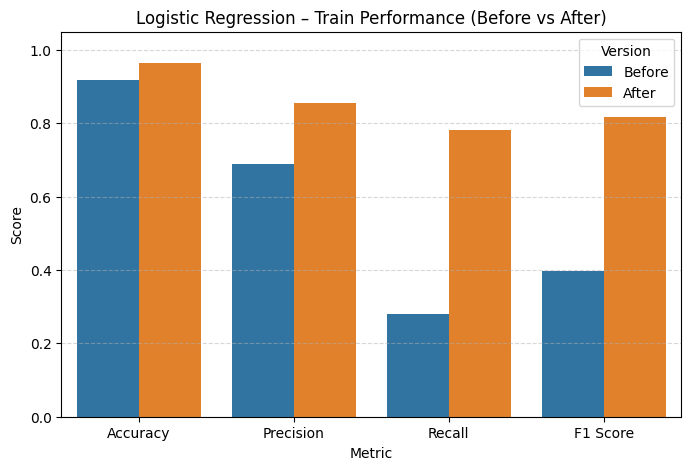

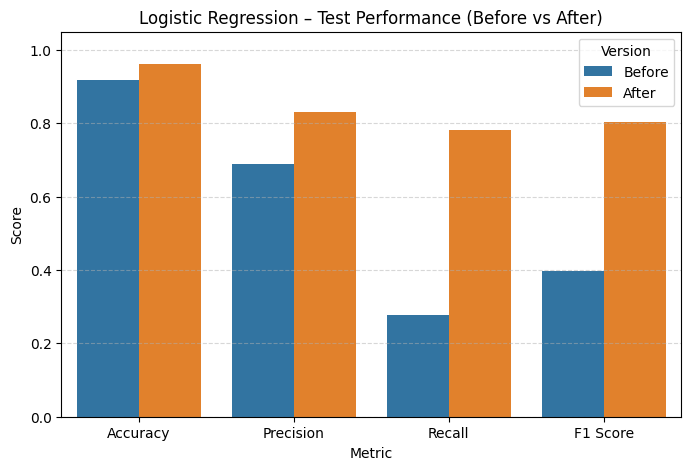

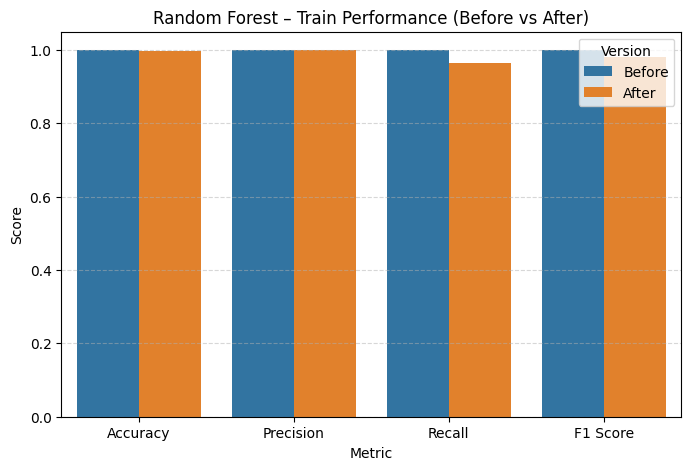

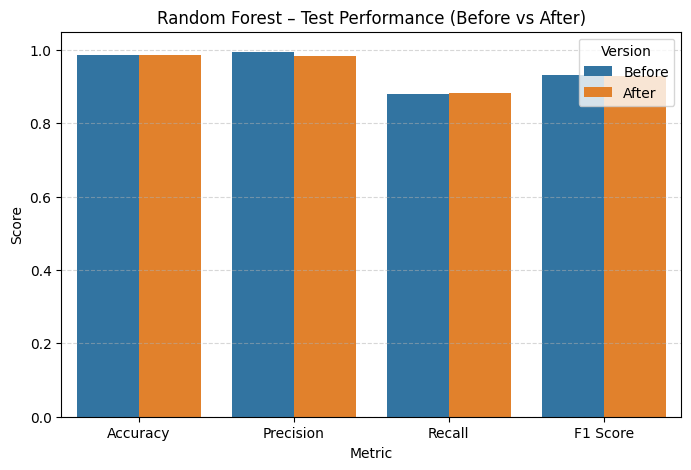

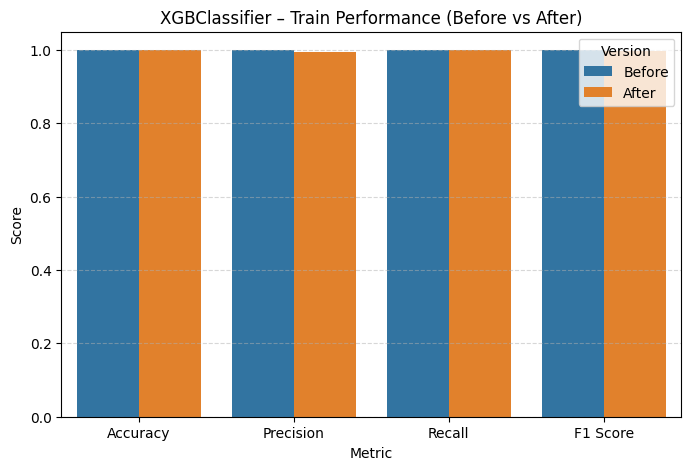

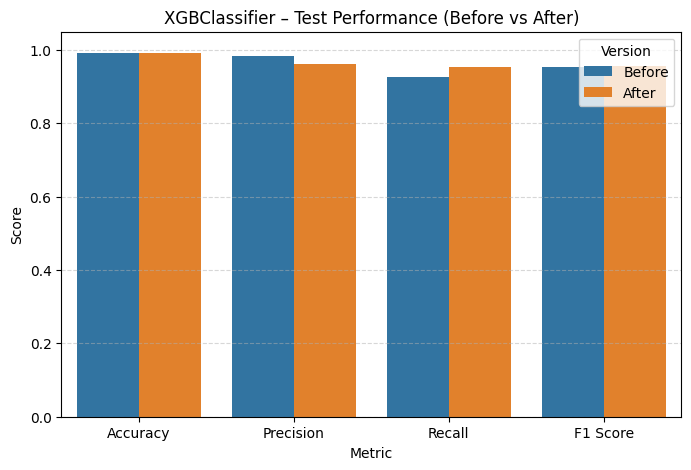

In [28]:
def plot_model_before_after_bars(model_name, before_results, after_results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    # Extract values
    train_before = before_results[model_name]['Train'].values
    train_after = after_results[model_name]['Train'].values
    test_before = before_results[model_name]['Test'].values
    test_after = after_results[model_name]['Test'].values

    # Prepare data for plotting
    train_data = pd.DataFrame({
        'Metric': metrics,
        'Before': train_before,
        'After': train_after
    }).melt(id_vars='Metric', var_name='Version', value_name='Score')

    test_data = pd.DataFrame({
        'Metric': metrics,
        'Before': test_before,
        'After': test_after
    }).melt(id_vars='Metric', var_name='Version', value_name='Score')

    # Plot Train
    plt.figure(figsize=(8, 5))
    sns.barplot(data=train_data, x='Metric', y='Score', hue='Version')
    plt.title(f'{model_name} – Train Performance (Before vs After)')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    # Plot Test
    plt.figure(figsize=(8, 5))
    sns.barplot(data=test_data, x='Metric', y='Score', hue='Version')
    plt.title(f'{model_name} – Test Performance (Before vs After)')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

for model_name in before_optimisation_results.keys():
    plot_model_before_after_bars(model_name, before_optimisation_results, after_optimisation_results)

## Comparing Performance Between Models

In [29]:
def create_metric_table(metric_name, model_results_dict):
    rows = []

    for model_name, df in model_results_dict.items():
        # Extract train and test values for the given metric
        metric_row = df[df['Metric'] == metric_name]
        if not metric_row.empty:
            train_val = metric_row['Train'].values[0]
            test_val = metric_row['Test'].values[0]
            rows.append([model_name, train_val, test_val])

    # Create DataFrame and sort by Test performance
    df_metric = pd.DataFrame(rows, columns=['Model', 'Train', 'Test'])
    df_metric_sorted = df_metric.sort_values(by='Test', ascending=False).reset_index(drop=True)

    return df_metric_sorted

# Show sorted comparison tables for each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    print(f"\n{metric} Comparison")
    display(create_metric_table(metric, after_optimisation_results))


Accuracy Comparison


,Model,Train,Test
0,XGBClassifier,0.999540,0.991696
1,Random Forest,0.996472,0.987115
2,Logistic Regression,0.965638,0.963064



Precision Comparison


,Model,Train,Test
0,Random Forest,0.999023,0.983660
1,XGBClassifier,0.995307,0.960857
2,Logistic Regression,0.854245,0.830218



Recall Comparison


,Model,Train,Test
0,XGBClassifier,1.000000,0.953812
1,Random Forest,0.964791,0.882698
2,Logistic Regression,0.781201,0.781525



F1 Score Comparison


,Model,Train,Test
0,XGBClassifier,0.997648,0.957322
1,Random Forest,0.981609,0.930448
2,Logistic Regression,0.816092,0.805136


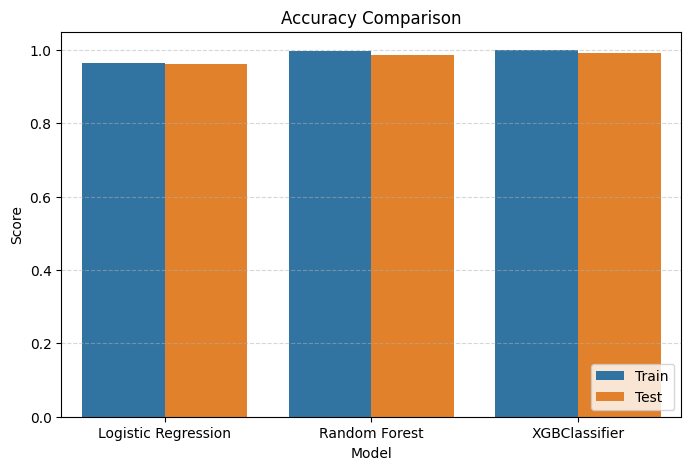

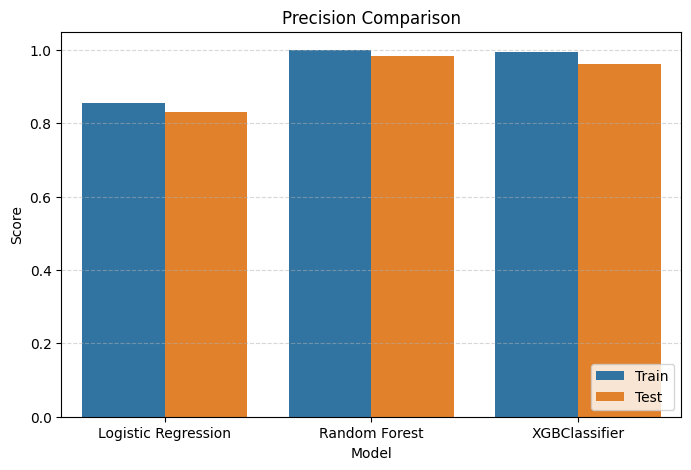

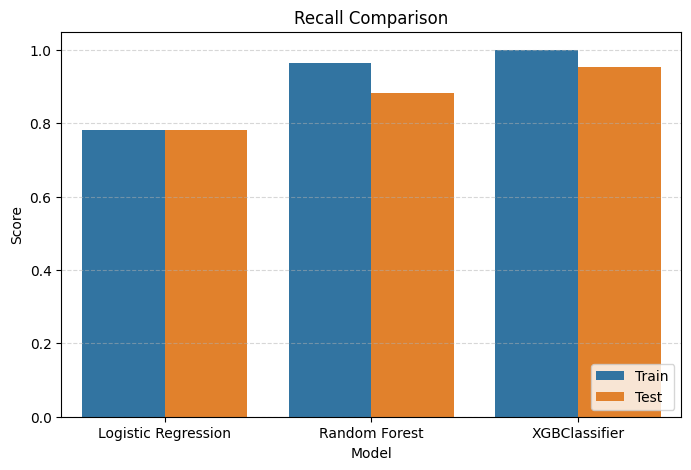

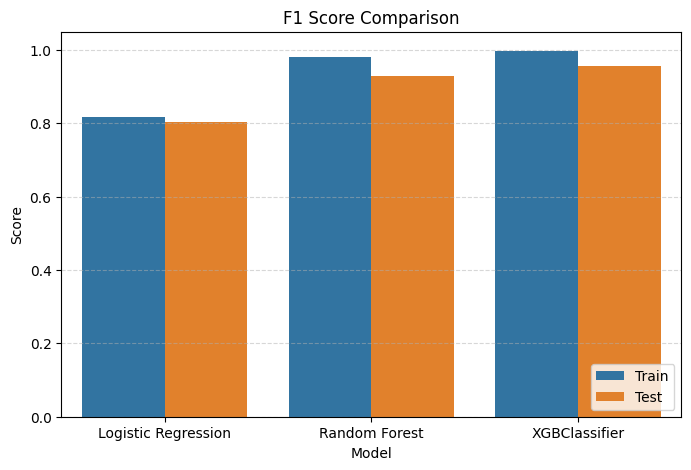

In [30]:
def plot_metric_bar_chart(metric_name, model_results_dict):

    data = []

    for model_name, df in model_results_dict.items():
        row = df[df['Metric'] == metric_name]
        if not row.empty:
            train_val = row['Train'].values[0]
            test_val = row['Test'].values[0]
            data.append({'Model': model_name, 'Set': 'Train', 'Score': train_val})
            data.append({'Model': model_name, 'Set': 'Test', 'Score': test_val})

    df_plot = pd.DataFrame(data)

    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_plot, x='Model', y='Score', hue='Set')
    plt.title(f'{metric_name} Comparison')
    plt.ylim(0, 1.05)
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plot_metric_bar_chart(metric, after_optimisation_results)

## Confusion Matrix For Each Model

In [31]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=["Class 0", "Class 1"],
        cmap='Blues',
        normalize=None
    )
    disp.ax_.set_title(f'{model_name} - Confusion Matrix')
    plt.show()

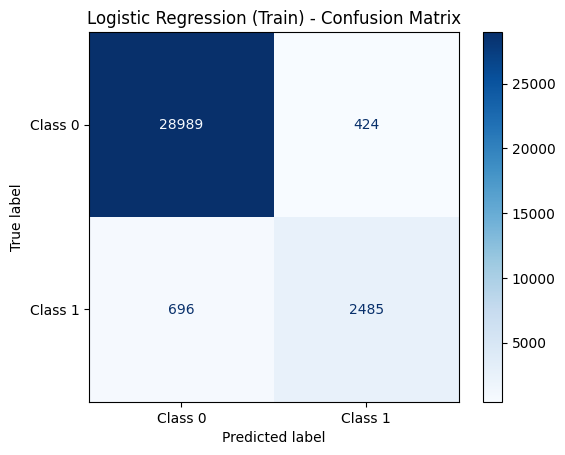

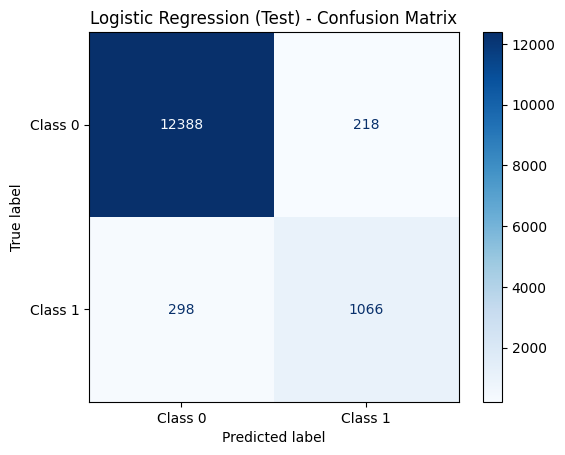

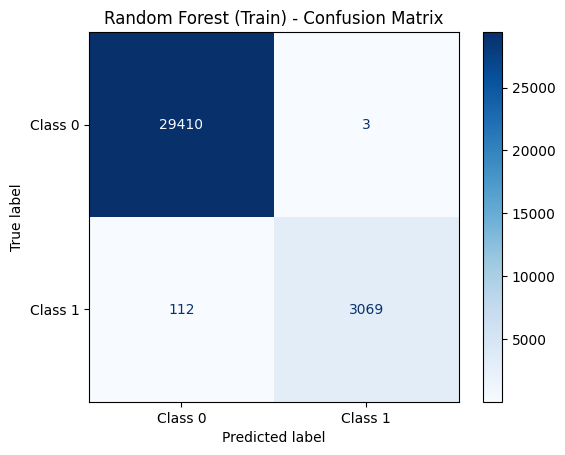

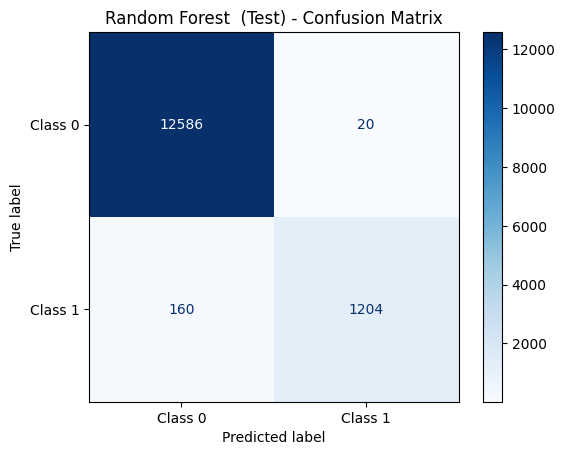

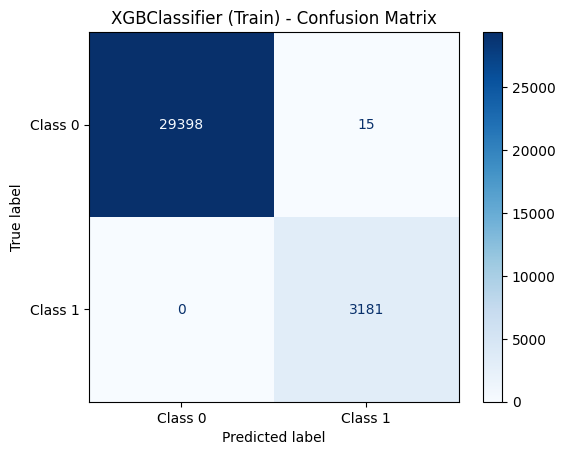

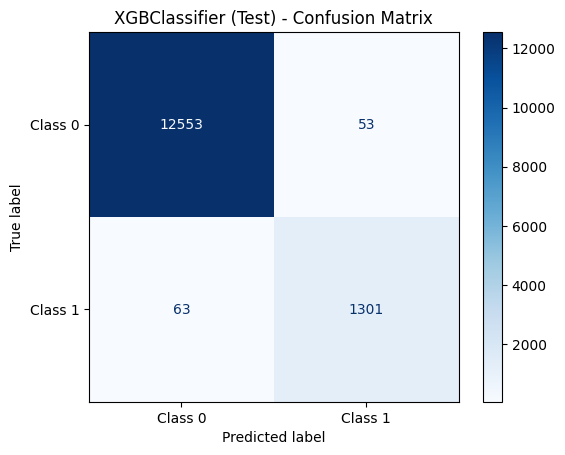

In [32]:
plot_confusion_matrix(y_train, y_pred_train_lr, "Logistic Regression (Train)")
plot_confusion_matrix(y_test, y_pred_test_lr, "Logistic Regression (Test)")

plot_confusion_matrix(y_train, y_pred_train_rf, "Random Forest (Train)")
plot_confusion_matrix(y_test, y_pred_test_rf, "Random Forest  (Test)")

plot_confusion_matrix(y_train, y_pred_train_xgb, "XGBClassifier (Train)")
plot_confusion_matrix(y_test, y_pred_test_xgb, "XGBClassifier (Test)")

# Export for Deployment

## Model to be Deployed

In [33]:
# Save the best model
joblib.dump(xgb_best_model, 'model.pkl')

# Download/export the best model
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## SHAP Explainer

In [34]:
# Create SHAP explainer for your XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Save explainer to file
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

# Download/export the SHAP explainer
files.download('explainer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>